# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
#print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# eg: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c1f0ef346b8b82d638f6bd65672e6dd&q=avarua 

# base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Params 
units = "Imperial"
APPID = api_key
q = cities

In [7]:
# create dataframe for city data

weatherpy_df = pd.DataFrame(cities)
weatherpy_df.columns=["City"]
#weatherpy_df.head()


#set aditional columns 
weatherpy_df['Cloudiness'] = ""
weatherpy_df['Country'] = ""
weatherpy_df['Date'] = ""
weatherpy_df['Humidity'] = ""
weatherpy_df['Lat'] = ""
weatherpy_df['Lan'] = ""
weatherpy_df['Max_Temp'] = ""
weatherpy_df['Wind_Speed'] = ""

weatherpy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lan,Max_Temp,Wind_Speed
0,mataura,,,,,,,,
1,trairi,,,,,,,,
2,we,,,,,,,,
3,illoqqortoormiut,,,,,,,,
4,port elizabeth,,,,,,,,


In [9]:
# setup 
record = 0
set = 1



print("Beginning Data Retrieval")
print("------------------------------")


for index, row in weatherpy_df.iterrows():
# for row in city_df.iterrows():
    city = row['City']
    
    try:
        q_url = base_url+"units="+units+"&APPID="+APPID+"&q="+city
        weatherpy = requests.get(q_url).json()
        
        print(f"processing record {record} of set {set} | {city}")
        

#         city_df.loc[index, 'City'] = response['name']
        weatherpy_df.loc[index, 'Lan'] = weatherpy['coord']['lon']
        weatherpy_df.loc[index, 'Lat'] = weatherpy['coord']['lat']
        weatherpy_df.loc[index, 'Cloudiness'] = weatherpy['clouds']['all']
        weatherpy_df.loc[index, 'Country'] = weatherpy['sys']['country']
        weatherpy_df.loc[index, 'Date'] =  weatherpy['dt']
        weatherpy_df.loc[index, 'Humidity'] = weatherpy['main']['humidity']
        weatherpy_df.loc[index, 'Max_Temp'] = weatherpy['main']['temp_max']
        weatherpy_df.loc[index, 'Wind_Speed']= weatherpy['wind']['speed']
        
        
        record = record + 1
        if record >= 51:
            record= 0
            set = set + 1
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

        
        
# Data Retrieval Complete      

print("---------------------------")
print("Data Retrieval Complete ")
print("---------------------------")

Beginning Data Retrieval
------------------------------
processing record 0 of set 1 | mataura
processing record 1 of set 1 | trairi
processing record 2 of set 1 | we
City not found. Skipping...
processing record 2 of set 1 | illoqqortoormiut
City not found. Skipping...
processing record 2 of set 1 | port elizabeth
processing record 3 of set 1 | castro
processing record 4 of set 1 | carnarvon
processing record 5 of set 1 | tuatapere
processing record 6 of set 1 | grindavik
processing record 7 of set 1 | chokurdakh
processing record 8 of set 1 | comodoro rivadavia
processing record 9 of set 1 | honningsvag
processing record 10 of set 1 | mount isa
processing record 11 of set 1 | lasa
processing record 12 of set 1 | bluff
processing record 13 of set 1 | belushya guba
City not found. Skipping...
processing record 13 of set 1 | butaritari
processing record 14 of set 1 | leningradskiy
processing record 15 of set 1 | piacabucu
processing record 16 of set 1 | victoria
processing record 17 of 

In [13]:
weatherpy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lan,Max_Temp,Wind_Speed
0,mataura,76,NZ,1570998840,88,-46.19,168.86,51.01,1.01
1,trairi,67,BR,1570998840,69,-3.28,-39.27,76.96,7.52
2,we,,,,,,,,
3,illoqqortoormiut,,,,,,,,
4,port elizabeth,90,US,1570998841,67,39.31,-74.98,68,8.05


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weatherpy_df.count()

City          620
Cloudiness    620
Country       620
Date          620
Humidity      620
Lat           620
Lan           620
Max_Temp      620
Wind_Speed    620
dtype: int64

In [20]:
# Save city data to a csv file
weatherpy_df.to_csv("cities.csv", index=False)

In [21]:
weatherpy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lan,Max_Temp,Wind_Speed
0,mataura,76,NZ,1570998840,88,-46.19,168.86,51.01,1.01
1,trairi,67,BR,1570998840,69,-3.28,-39.27,76.96,7.52
2,we,,,,,,,,
3,illoqqortoormiut,,,,,,,,
4,port elizabeth,90,US,1570998841,67,39.31,-74.98,68,8.05


In [22]:
weatherpy_df.dtypes

City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lan           object
Max_Temp      object
Wind_Speed    object
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [25]:
weather_df = pd.read_csv("cities.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lan,Max_Temp,Wind_Speed
0,mataura,76.0,NZ,1.570999e+09,88.0,-46.19,168.86,51.01,1.01
1,trairi,67.0,BR,1.570999e+09,69.0,-3.28,-39.27,76.96,7.52
2,we,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,port elizabeth,90.0,US,1.570999e+09,67.0,39.31,-74.98,68.00,8.05


In [26]:
weather_df.dtypes

City           object
Cloudiness    float64
Country        object
Date          float64
Humidity      float64
Lat           float64
Lan           float64
Max_Temp      float64
Wind_Speed    float64
dtype: object

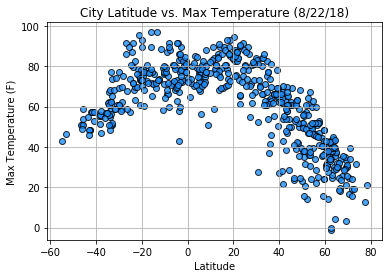

In [28]:
# x & y coordinates 
x1 = weather_df["Lat"]
y1 = weather_df["Max_Temp"]

#disply scatter plot
plt.scatter(x1, y1, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)

#label/title/ grid 

plt.title("City Latitude vs. Max Temperature (8/22/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the plot 
plt.savefig("images/latitude_temp.png")


# Display the graph
plt.show()

#### Latitude vs. Humidity Plot

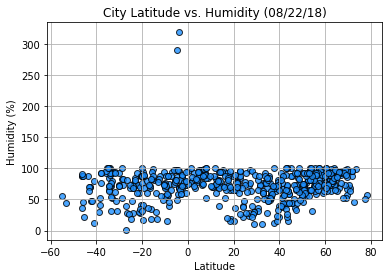

In [29]:
x2 = weather_df["Lat"]
y2 = weather_df["Humidity"]

plt.scatter(x2, y2, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)

plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("images/latitude_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

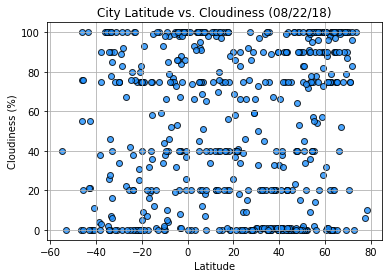

In [30]:
x3 = weather_df["Lat"]
y3 = weather_df["Cloudiness"]



plt.scatter(x3, y3, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)



plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



plt.savefig("images/latitude_cloudiness.png")



plt.show()

#### Latitude vs. Wind Speed Plot

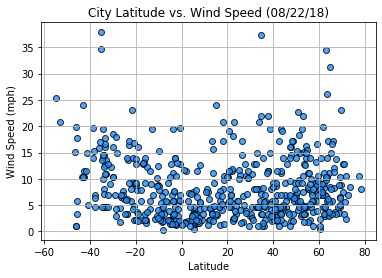

In [31]:
x4 = weather_df["Lat"]
y4 = weather_df["Wind_Speed"]


plt.scatter(x4, y4, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)


plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("images/latitude_wind_speed.png")


plt.show()